Load Libraries

In [85]:
# Importing Libraries

# data analysis and wrangling
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# Data Loading
import os

Load Dataset

In [86]:
# Loading Data Files
os.chdir('C:/04-AIML/03 Supervised Learning/02 Project/Data File/Part 2')
df_data1 = pd.read_csv("Part2 - Data1.csv")
df_data2 = pd.read_csv("Part2 -Data2.csv")

 Explore shape and size of each datasets.

In [87]:
# Shape of the each datasets
df_data1.shape
df_data2.shape
print("Data1 Shape is :",df_data1.shape)
print("Data2 Shape is :", df_data2.shape)

Data1 Shape is : (5000, 8)
Data2 Shape is : (5000, 7)


In [88]:
# Size of the each datasets
df_data1.size
df_data2.size
print("Data1 Size is :",df_data1.size)
print("Data2 Size is :", df_data2.size)

Data1 Size is : 40000
Data2 Size is : 35000


Merge all datasets onto one and explore final shape and size.

In [89]:
# Merging all the datafiles into one
df_merge = pd.merge(df_data1, df_data2, left_on='ID', right_on='ID')

In [13]:
df_merge

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [91]:
# Shape of the append dataset
df_merge.shape

(5000, 14)

In [92]:
# Size of the append dataset
df_merge.size

70000

In [ ]:
# Storing the merge file in a folder
df_merge.to_csv('C:/04-AIML/03 Supervised Learning/02 Project/Data File/Part 2/console_merge.csv',index=False)

In [17]:
# Check for datatypes
df_merge.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [93]:
# Display Header Information
df_merge.head(5)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


Explore for null values and dropping the null values

In [94]:
# Finding Missing Value 
df_merge.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [95]:
# Dropping null values
df_final = df_merge.dropna()

In [21]:
# Checking the null values after dropping
df_final.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [96]:
# Dropping the ID and ZipCode Attributes
df_final = df_final.drop(["ID","ZipCode"],axis=1)

In [97]:
# Displaying Header Information
df_final.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,34,9,180,1,8.9,3,0,0,0,0,0,1.0
10,65,39,105,4,2.4,3,0,0,0,0,0,0.0
11,29,5,45,3,0.1,2,0,0,0,1,0,0.0
12,48,23,114,2,3.8,3,0,1,0,0,0,0.0
13,59,32,40,4,2.5,2,0,0,0,1,0,0.0


In [98]:
# Check the shape of the datasets
df_final.shape

(4980, 12)

In [99]:
# Check the size of the datasets
df_final.size

59760

In [100]:
df_final['LoanOnCard'].value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

<AxesSubplot:title={'center':'LoanOnCard'}, xlabel='LoanOnCard', ylabel='count'>

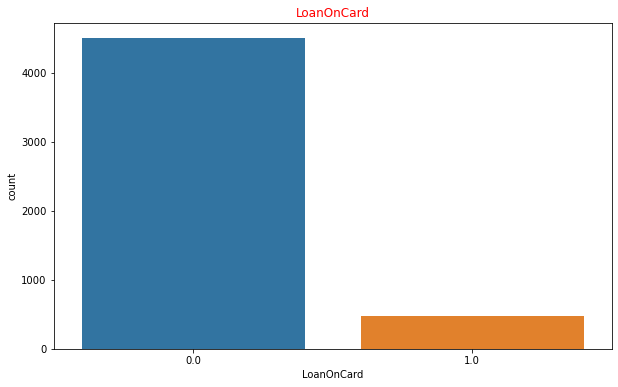

In [27]:
fig, ax = plt.subplots(figsize = (10,6))
ax.set_title('LoanOnCard', color = 'red')
sns.countplot(x = 'LoanOnCard', data = df_final)

In [101]:
# Descriptive Statistics
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4980.0,45.352610,11.464212,23.0,35.0,45.0,55.000,67.0
CustomerSince,4980.0,20.117671,11.468716,-3.0,10.0,20.0,30.000,43.0
HighestSpend,4980.0,73.852410,46.070090,8.0,39.0,64.0,98.000,224.0
HiddenScore,4980.0,2.395582,1.147200,1.0,1.0,2.0,3.000,4.0
MonthlyAverageSpend,4980.0,1.939536,1.750006,0.0,0.7,1.5,2.525,10.0
Level,4980.0,1.880924,0.840144,1.0,1.0,2.0,3.000,3.0
Mortgage,4980.0,56.589759,101.836758,0.0,0.0,0.0,101.000,635.0
Security,4980.0,0.104418,0.305832,0.0,0.0,0.0,0.000,1.0
FixedDepositAccount,4980.0,0.060643,0.238697,0.0,0.0,0.0,0.000,1.0
InternetBanking,4980.0,0.597189,0.490513,0.0,0.0,1.0,1.000,1.0


<AxesSubplot:>

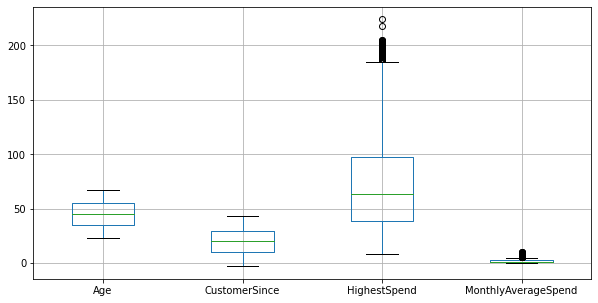

In [102]:
# Check for Outliers
df_final.boxplot(column = ['Age', 'CustomerSince', 'HighestSpend', 'MonthlyAverageSpend'], figsize = (10,5))

 1. It is evident that highest spend and Montly Average Spend is having outliers
 2. Median is high for the attribute 'HighestSpend' in compare to 'Age' , 'CustomerSince' & 'MonthlyAverageSpend'

In [103]:
df_final['Age'].describe()

count    4980.000000
mean       45.352610
std        11.464212
min        23.000000
25%        35.000000
50%        45.000000
75%        55.000000
max        67.000000
Name: Age, dtype: float64

Range of Age = Max- Min = 67-23 = 44

Interquartile Range of Age = Q3-Q1 = 55-35 = 20

In [104]:
#Check number of outliers greater than upper fence and determining Lower Fence

out=[]
def iqr_outliers(df_final):
    q1 = df_final.quantile(0.25)
    q3 = df_final.quantile(0.75)
    iqr = q3-q1
    Lower_fence = q1 - 1.5 * iqr
    Upper_fence = q3 + 1.5 * iqr
    for i in df_final:
         if i > Upper_fence :
                 out.append(i)
    print("Outliers:",out)
    
    print('Lower Fence is', Lower_fence)
    print('Upper Fence is', Upper_fence)

In [32]:
iqr_outliers(df_final['HighestSpend'])

Outliers: [193, 194, 190, 188, 195, 191, 200, 205, 204, 195, 192, 194, 202, 195, 200, 193, 192, 195, 191, 188, 191, 190, 190, 194, 195, 192, 190, 195, 191, 192, 195, 192, 193, 190, 198, 201, 200, 188, 192, 190, 194, 201, 191, 191, 188, 203, 189, 193, 190, 204, 198, 201, 201, 191, 191, 195, 190, 188, 190, 195, 195, 205, 198, 190, 191, 191, 195, 194, 194, 202, 191, 199, 203, 188, 224, 188, 189, 191, 190, 195, 193, 204, 194, 195, 191, 188, 195, 188, 193, 199, 188, 199, 194, 201, 195, 218]
Lower Fence is -49.5
Upper Fence is 186.5


In [105]:
# Drop the values that are greater than upper fence.
df1=df_final[df_final['HighestSpend']<186.5] 
df1

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,34,9,180,1,8.9,3,0,0,0,0,0,1.0
10,65,39,105,4,2.4,3,0,0,0,0,0,0.0
11,29,5,45,3,0.1,2,0,0,0,1,0,0.0
12,48,23,114,2,3.8,3,0,1,0,0,0,0.0
13,59,32,40,4,2.5,2,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0,0.0
4996,30,4,15,4,0.4,1,85,0,0,1,0,0.0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0.0
4998,65,40,49,3,0.5,2,0,0,0,1,0,0.0


Detecting and Removing Outliers

In [108]:
#Check number of outliers greater than upper fence and determining Lower Fence

out=[]
def iqr_outliers(df1):
    q1 = df1.quantile(0.25)
    q3 = df1.quantile(0.75)
    iqr = q3-q1
    Lower_fence = q1 - 1.5 * iqr
    Upper_fence = q3 + 1.5 * iqr
    for i in df1:
         if i > Upper_fence :
                 out.append(i)
    print("Outliers:",out)
    
    print('Lower Fence is', Lower_fence)
    print('Upper Fence is', Upper_fence)

In [109]:
iqr_outliers(df1['MonthlyAverageSpend'])

Outliers: [8.9, 5.7, 8.0, 5.7, 5.6, 7.2, 7.4, 7.5, 6.5, 6.5, 7.8, 7.9, 6.8, 7.4, 7.5, 7.9, 6.2, 5.5, 6.9, 7.5, 7.3, 6.1, 6.6, 5.3, 7.5, 6.8, 7.0, 6.6, 6.3, 7.5, 5.7, 8.3, 5.5, 6.9, 6.1, 6.0, 8.0, 6.8, 7.8, 7.2, 6.5, 6.8, 6.0, 7.2, 8.6, 6.9, 6.1, 7.8, 6.0, 7.6, 7.4, 6.1, 7.0, 6.9, 7.6, 6.3, 7.6, 6.0, 5.9, 8.1, 5.4, 8.8, 5.4, 6.33, 8.1, 5.7, 7.6, 7.3, 7.0, 5.7, 6.1, 6.9, 6.8, 7.0, 6.5, 7.4, 7.8, 8.0, 7.0, 8.0, 6.8, 6.3, 6.3, 8.1, 5.4, 6.9, 9.0, 6.0, 8.6, 5.9, 5.4, 7.4, 6.8, 5.4, 7.3, 7.4, 6.7, 6.9, 6.0, 7.0, 6.7, 7.4, 6.3, 6.0, 6.0, 7.6, 7.4, 7.2, 5.3, 5.7, 8.6, 5.8, 7.8, 6.0, 5.4, 7.4, 8.1, 6.0, 6.33, 6.0, 6.5, 5.67, 7.3, 8.5, 8.0, 6.7, 7.3, 8.0, 6.5, 6.5, 5.67, 7.3, 8.0, 5.4, 5.7, 6.9, 7.0, 6.7, 6.8, 5.9, 7.5, 5.6, 6.67, 6.1, 7.5, 8.0, 6.1, 6.7, 7.4, 7.3, 6.7, 6.5, 6.1, 6.0, 6.9, 6.3, 7.8, 6.67, 6.0, 6.1, 7.4, 7.9, 7.5, 5.4, 5.7, 5.4, 7.2, 5.4, 8.0, 6.1, 5.7, 5.4, 7.2, 8.8, 7.0, 6.5, 7.9, 6.3, 6.9, 7.6, 6.0, 5.8, 8.2, 5.7, 6.67, 8.1, 7.5, 7.8, 5.9, 6.7, 7.0, 8.6, 7.0, 6.1, 5.5, 5.7, 5.

In [110]:
# Drop the values that are greater than upper fence.
df2=df1[df1['MonthlyAverageSpend']<5.2] 
df2

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
10,65,39,105,4,2.4,3,0,0,0,0,0,0.0
11,29,5,45,3,0.1,2,0,0,0,1,0,0.0
12,48,23,114,2,3.8,3,0,1,0,0,0,0.0
13,59,32,40,4,2.5,2,0,0,0,1,0,0.0
14,67,41,112,1,2.0,1,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0,0.0
4996,30,4,15,4,0.4,1,85,0,0,1,0,0.0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0.0
4998,65,40,49,3,0.5,2,0,0,0,1,0,0.0


<AxesSubplot:>

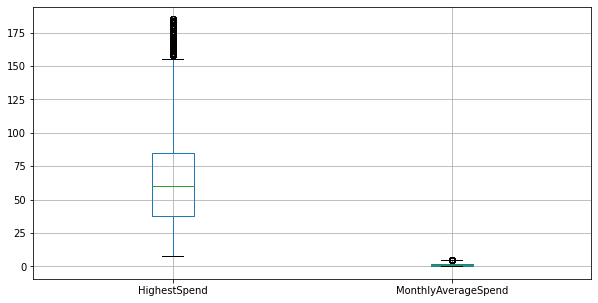

In [160]:
df2.boxplot(column = [ 'HighestSpend', 'MonthlyAverageSpend'], figsize = (10,5))

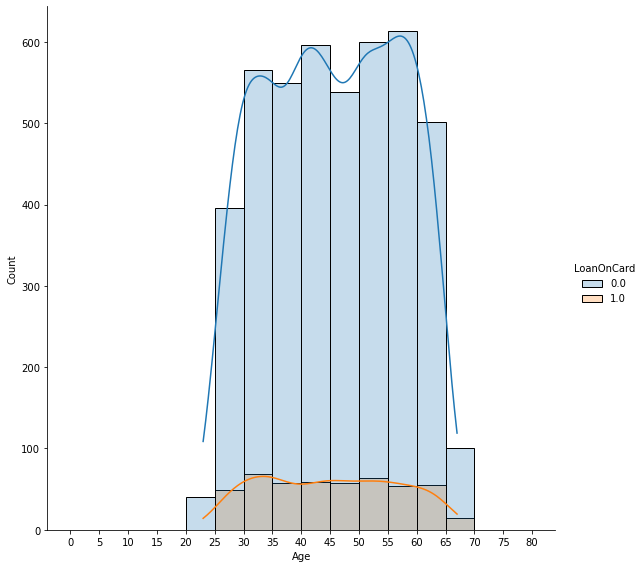

In [162]:
#Distribution plots of ages & Loan on Card
g=sns.displot(data=df_final, x="Age", hue="LoanOnCard", kde=True, alpha=0.25, height=8, aspect=1, bins=[x for x in np.linspace(0,80,17)])
g.set(xticks=[x for x in np.linspace(0,80,17)]);

1.Higher Frequency of distribution for age is in between 30-60 Years

2.Across all the age group the percentage of no Loan on Card is far higher

3. Assumption on 'LoanOnCard' :0 - No Loan  1 - Loan


In [112]:
cor =df2.corr()
cor

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
Age,1.000000,0.994199,-0.033063,-0.059569,-0.027122,0.031026,-0.015134,-0.001096,0.004502,0.012197,0.004620,-0.009929
CustomerSince,0.994199,1.000000,-0.025264,-0.065102,-0.029114,0.003349,-0.013471,-0.001970,0.007629,0.011828,0.006228,-0.007313
HighestSpend,-0.033063,-0.025264,1.000000,-0.141502,0.502316,-0.162337,0.188493,-0.001833,0.136921,0.005890,0.001039,0.478166
HiddenScore,-0.059569,-0.065102,-0.141502,1.000000,-0.061709,0.036211,-0.023384,0.016371,-0.000245,0.013863,0.001376,0.031675
MonthlyAverageSpend,-0.027122,-0.029114,0.502316,-0.061709,1.000000,-0.062612,0.071410,0.024730,0.094185,-0.019316,-0.003585,0.320412
Level,0.031026,0.003349,-0.162337,0.036211,-0.062612,1.000000,-0.039200,-0.012037,-0.007220,-0.020067,-0.014436,0.097930
Mortgage,-0.015134,-0.013471,0.188493,-0.023384,0.071410,-0.039200,1.000000,-0.004162,0.078108,-0.004619,-0.013688,0.111388
Security,-0.001096,-0.001970,-0.001833,0.016371,0.024730,-0.012037,-0.004162,1.000000,0.325588,0.012551,-0.011165,0.014624
FixedDepositAccount,0.004502,0.007629,0.136921,-0.000245,0.094185,-0.007220,0.078108,0.325588,1.000000,0.166975,0.268689,0.269288
InternetBanking,0.012197,0.011828,0.005890,0.013863,-0.019316,-0.020067,-0.004619,0.012551,0.166975,1.000000,0.002831,-0.006495


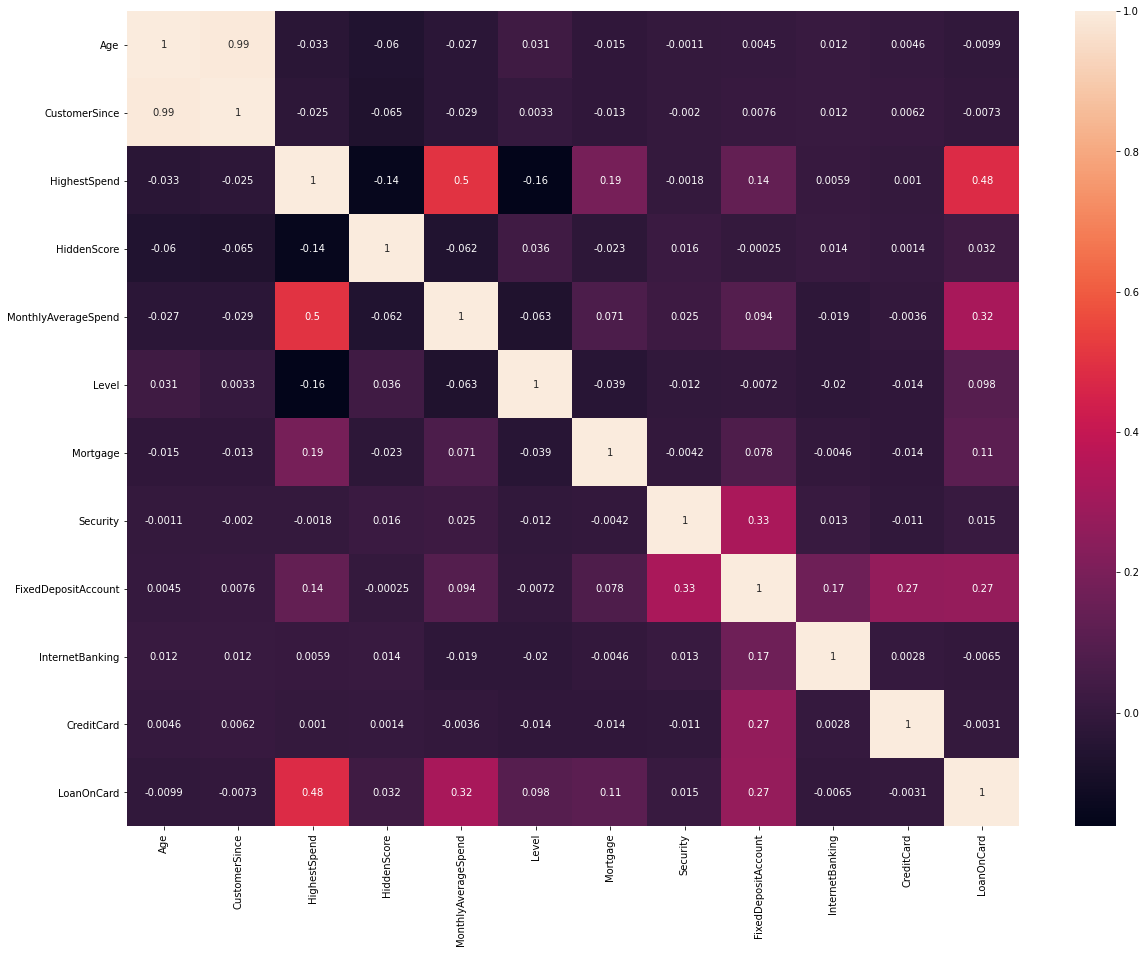

In [163]:
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(cor, annot=True,  ax=ax)
plt.show()

1. Above correlation plot indicates there is a positive correlation between HighestSpend and MonthlyAverageSpend
2. 'CustomerSince' and 'Age' is highly correlated . As Age increases 'CustomerSince' also increases and viceversa

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'CustomerSince'}>],
       [<AxesSubplot:title={'center':'HighestSpend'}>,
        <AxesSubplot:title={'center':'HiddenScore'}>],
       [<AxesSubplot:title={'center':'MonthlyAverageSpend'}>,
        <AxesSubplot:title={'center':'Level'}>],
       [<AxesSubplot:title={'center':'Mortgage'}>,
        <AxesSubplot:title={'center':'Security'}>],
       [<AxesSubplot:title={'center':'FixedDepositAccount'}>,
        <AxesSubplot:title={'center':'InternetBanking'}>],
       [<AxesSubplot:title={'center':'CreditCard'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

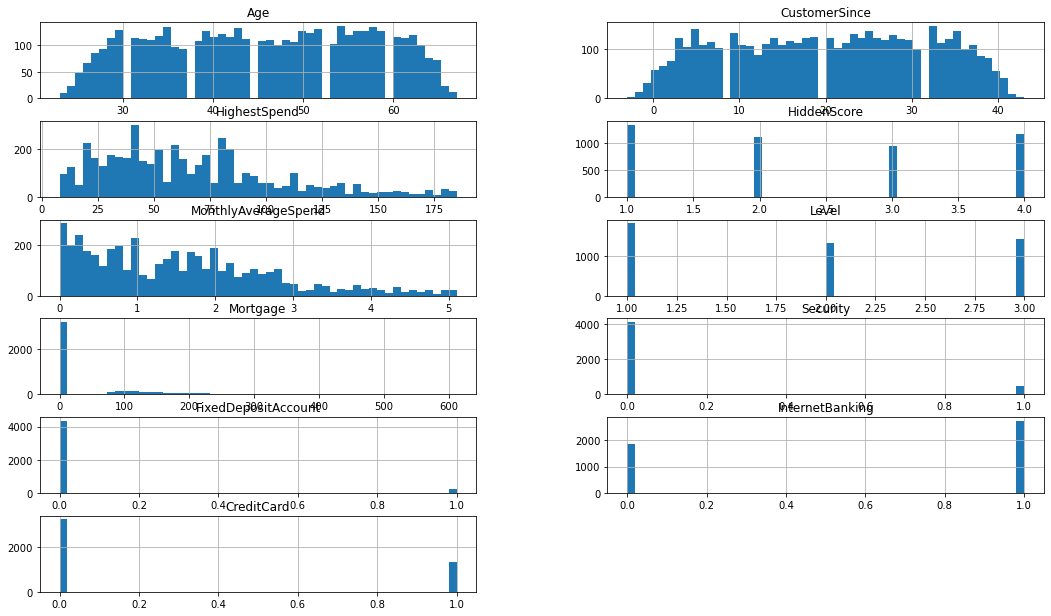

In [114]:
# Histogram for independent attributes
columns=list(df2)[0:-1]
df2[columns].hist(figsize=(18,25),bins=50,stacked=False,layout=(14,2))

C:\Users\srikanthve\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


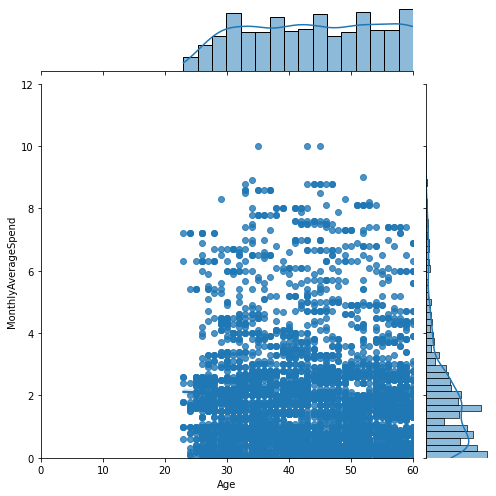

In [164]:
 sns.jointplot("Age", "MonthlyAverageSpend", data=df_final, kind="reg",
                  xlim=(0, 60), ylim=(0, 12),  height=7);

In [121]:
df2.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
10,65,39,105,4,2.4,3,0,0,0,0,0,0.0
11,29,5,45,3,0.1,2,0,0,0,1,0,0.0
12,48,23,114,2,3.8,3,0,1,0,0,0,0.0
13,59,32,40,4,2.5,2,0,0,0,1,0,0.0
14,67,41,112,1,2.0,1,0,1,0,0,0,0.0


In [124]:
#Segregate predictors vs target attributes
y=df2["LoanOnCard"].values
x=df2.drop(["LoanOnCard"],axis=1)

In [125]:
df2['LoanOnCard'].value_counts()

0.0    4265
1.0     324
Name: LoanOnCard, dtype: int64

<AxesSubplot:>

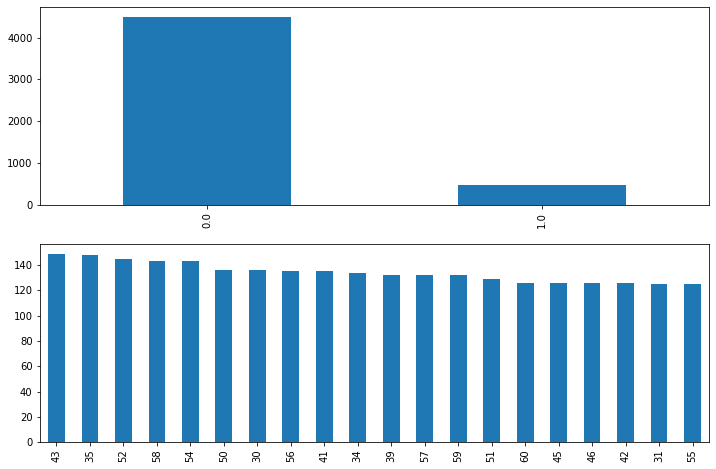

In [57]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

df_final['LoanOnCard'].value_counts().sort_index().plot.bar(ax=axarr[0])

df_final['Age'].value_counts().head(20).plot.bar(
    ax=axarr[1])

In [58]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [59]:
#Lets check split of data
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df_final.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df_final.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [60]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (3486, 11)
y_train shape:  (3486,)
x_test shape:  (1494, 11)
y_test shape:  (1494,)


In [67]:
sm = SMOTE(random_state=1)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

from collections import Counter
print("Before Smote :",Counter(y_train))
print("After Smote :",Counter(y_train_res))

After OverSampling, the shape of train_x: (6318, 11)
After OverSampling, the shape of train_y: (6318,) 

Before Smote : Counter({0.0: 3159, 1.0: 327})
After Smote : Counter({0.0: 3159, 1.0: 3159})


SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

From the above minority class = 1.0 = 327 
From the above majority class = 0.0 = 3159

After smote the datasets are balanced


In [ ]:
Logistic Regression

In [127]:
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(x_train, y_train)
y_pred_test = logreg.predict(x_test)
y_pred_test

array([0., 0., 0., ..., 0., 0., 0.])

In [128]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9431


In [129]:
y_pred_train = logreg.predict(x_train)
y_pred_train

array([0., 0., 0., ..., 0., 1., 0.])

In [130]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Test-set accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Training-set accuracy score: 0.9524
Test-set accuracy score: 0.9431


In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      1341
         1.0       0.81      0.58      0.68       153

    accuracy                           0.94      1494
   macro avg       0.88      0.78      0.82      1494
weighted avg       0.94      0.94      0.94      1494



In [132]:
mat_train = confusion_matrix(y_train,y_pred_train)
print("confusion matrix_train_data = \n",mat_train)

confusion matrix_train_data = 
 [[3117   42]
 [ 124  203]]


Confusion Matrix


<AxesSubplot:>

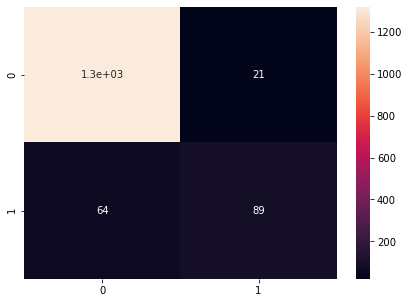

In [74]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test,y_pred_test)
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True)

In [167]:
# Print the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1320   21]
 [  64   89]]

True Positives(TP) =  1320

True Negatives(TN) =  89

False Positives(FP) =  21

False Negatives(FN) =  64


Gaussian Naive Bayes Classifier

In [133]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(x_train, y_train)

#Predict the Results
y_pred = gnb.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [134]:
# Check Accuracy Score
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8815


In [135]:
# Compare Train & Test Accuracy
y_pred_train = gnb.predict(x_train)
y_pred_train
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8873


In [136]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(x_test, y_test)))

Training set score: 0.8873
Test set score: 0.8815


In [140]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93      1341
         1.0       0.44      0.57      0.50       153

    accuracy                           0.88      1494
   macro avg       0.69      0.74      0.71      1494
weighted avg       0.90      0.88      0.89      1494



Confusion Matrix


<AxesSubplot:>

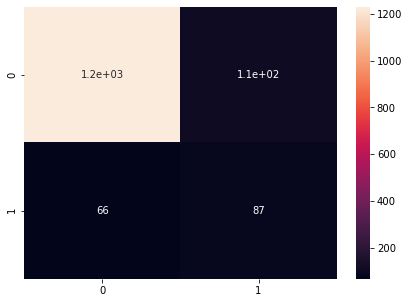

In [165]:
# visualize confusion matrix with seaborn heatmap

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test,y_pred)
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True)

In [166]:
# Print the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1230  111]
 [  66   87]]

True Positives(TP) =  1230

True Negatives(TN) =  87

False Positives(FP) =  111

False Negatives(FN) =  66


Prediction on True Positives are higher accuracy with the percentage of 88% and the misclassifications are low 

Possible tuning techniques for Logisitic Regression are as below

In [198]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
#logreg_cv.fit(x_train,y_train)
logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(x_train,y_train)
print("score",logreg2.score(x_test,y_test))
#print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
#print("accuracy :",logreg_cv.best_score_)

score 0.9451137884872824


C:\Users\srikanthve\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


From the above 2 models , Logistic Regression is the best model as both test and train accurancy is above 94% . 
Recommend to select Logistic Regression model against Naive Bayes.

After tuning Logistic Regression accuracy is 94.5%

As an improvement measure need to increase the sample size of the datasets and to conduct the model hypertuning towards
dimensionality reduction. Since the accuracy is higher need to conduct the pilot test of prediction

Need to also create the user interface where the user can able to run the model and based on the model output can compare the same with the actuals

quality -  Improve the quality of the data through ensuring the zero missing data and establishing the critical data capturing

quantity - Increase the sample size which is aligned to the near population 

variety - Identify of key factors through the data structuring and stratification/segmentation

velocity- Need to re-define data quality metrics so that they are relevant as well as feasible in the real-time context.

veracity- Data source and the data use should be properly aligned